In [ ]:
from fastai.vision.all import *
import pandas as pd

In [ ]:
# path = untar_data(URLs.IMAGENETTE_320)
# path.ls()

In [ ]:
# Opening JSON file
f = open('../data/classes.json')
# returns JSON object as 
# a dictionary
data = json.load(f)

In [ ]:
len(data)

82115

In [ ]:
from datasets import load_dataset
dataset = load_dataset('Maysee/tiny-imagenet') 

Using custom data configuration Maysee--tiny-imagenet-35af7c46a941f08e
Found cached dataset parquet (/home/sathiesh/.cache/huggingface/datasets/Maysee___parquet/Maysee--tiny-imagenet-35af7c46a941f08e/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    valid: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 100000
    })
})

In [ ]:
train, val = dataset['train'], dataset['valid']

In [ ]:
df = val.to_pandas()

In [ ]:
for index, value in df['image'].iteritems():
    df.at[index, 'image'] = value['bytes']

In [ ]:
df['label'] = df['label'].astype(str)
#df = df[~df['label'].str.contains(',')]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

(10000, 2)

In [ ]:
# train_data = {'image': train['image'], 'label': train['label'], 'is_val':False}
# train_df = pd.DataFrame.from_dict(train_data)

# val_data = {'image': val['image'], 'label': val['label'], 'is_val':True}
# val_df = pd.DataFrame.from_dict(val_data)

# df = pd.concat([train_df, val_df]).reset_index(drop=True)

In [ ]:
imagenet = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(),#ColSplitter('is_valid'),
                   get_x=ColReader('image'),
                   get_y=ColReader('label', label_delim=','),
                   item_tfms = Resize(460),
                   batch_tfms=aug_transforms(size=224))

In [ ]:
dls = imagenet.dataloaders(df, bs=32)

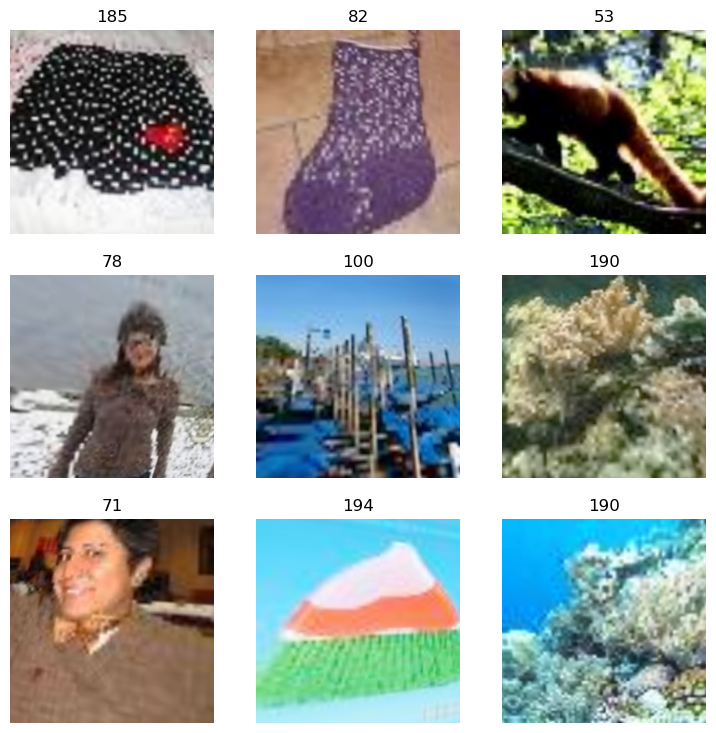

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=[partial(accuracy_multi, thresh=0.5)])

In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.217467,0.032418,0.995000,00:19


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.029508,0.024704,0.995022,00:24


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.top_losses(k=5, items=True)

(TensorBase([0.0444, 0.0440, 0.0428, 0.0420, 0.0410]),
 TensorBase([1865, 1537, 1713, 1517, 1235]),
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         image  \
 9994  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c

,target,predicted,probabilities,loss
0,199,,"TensorBase([0.0011, 0.0110, 0.0070, 0.0026, 0.0005, 0.0003, 0.0013, 0.0005,\n 0.0004, 0.0019, 0.0018, 0.0008, 0.0017, 0.0033, 0.0026, 0.0018,\n 0.0022, 0.0008, 0.0007, 0.0050, 0.0007, 0.0010, 0.0013, 0.0015,\n 0.0007, 0.0053, 0.0007, 0.0009, 0.0013, 0.0017, 0.0004, 0.0013,\n 0.0026, 0.0005, 0.0004, 0.0036, 0.0008, 0.0012, 0.0031, 0.0015,\n 0.0006, 0.0010, 0.0024, 0.0023, 0.0023, 0.0006, 0.0058, 0.0004,\n 0.0177, 0.0011, 0.0060, 0.0008, 0.0006, 0.0033, 0.0011, 0.0011,\n 0.0006, 0.0024, 0.0026, 0.0015, 0.0015, 0.0010, 0.0029, 0.0014,\n 0.0003, 0.0012, 0.0004, 0.0022, 0.0013, 0.0011, 0.0007, 0.0017,\n 0.0006, 0.0005, 0.0006, 0.0021, 0.0008, 0.0004, 0.0008, 0.0130,\n 0.0058, 0.0018, 0.0004, 0.0012, 0.0008, 0.0019, 0.0006, 0.0008,\n 0.0007, 0.0004, 0.0019, 0.0010, 0.0004, 0.0006, 0.0007, 0.0010,\n 0.0012, 0.0024, 0.0009, 0.0490, 0.0115, 0.0058, 0.0034, 0.0063,\n 0.0102, 0.0018, 0.0013, 0.0008, 0.0029, 0.0015, 0.0029, 0.0003,\n 0.0109, 0.0056, 0.0029, 0.0022, 0.0032, 0.0056, 0.0020, 0.0036,\n 0.0022, 0.0013, 0.0054, 0.0024, 0.0043, 0.0026, 0.0048, 0.0008,\n 0.0021, 0.0020, 0.0026, 0.0011, 0.0014, 0.0008, 0.0139, 0.0014,\n 0.0075, 0.0036, 0.0171, 0.0046, 0.0019, 0.0093, 0.0099, 0.0060,\n 0.0036, 0.0032, 0.0062, 0.0206, 0.0078, 0.0030, 0.0005, 0.0006,\n 0.0008, 0.0020, 0.0011, 0.0004, 0.0061, 0.0035, 0.0008, 0.0025,\n 0.0006, 0.0015, 0.0018, 0.0005, 0.0009, 0.0013, 0.0007, 0.0150,\n 0.0045, 0.0007, 0.0043, 0.0014, 0.0042, 0.0019, 0.0004, 0.0056,\n 0.0009, 0.0005, 0.0027, 0.0005, 0.0008, 0.0006, 0.0191, 0.0013,\n 0.0005, 0.0008, 0.0011, 0.0046, 0.0006, 0.0097, 0.0005, 0.0008,\n 0.0011, 0.0012, 0.0018, 0.0007, 0.0007, 0.0008, 0.0003, 0.0015])",0.044446028769016266
1,173,,"TensorBase([3.2701e-03, 4.0816e-05, 2.8206e-04, 3.2397e-04, 1.9466e-03,\n 9.4489e-04, 2.3210e-04, 9.2346e-04, 1.5769e-03, 1.1825e-03,\n 2.0128e-04, 1.6916e-03, 7.7315e-05, 6.7408e-04, 1.1365e-03,\n 4.6792e-04, 3.2128e-03, 3.4955e-04, 1.7551e-03, 4.0215e-04,\n 1.3814e-03, 4.5273e-04, 5.1427e-04, 6.0746e-04, 5.9253e-04,\n 8.9167e-05, 9.0684e-04, 6.8942e-03, 1.2596e-04, 2.1708e-03,\n 5.9149e-04, 1.2883e-03, 1.9129e-04, 2.9479e-03, 3.1723e-04,\n 4.5058e-05, 1.9814e-04, 2.7495e-04, 1.9564e-03, 3.4782e-04,\n 2.1113e-04, 2.3489e-04, 6.5693e-04, 5.7591e-04, 1.5072e-03,\n 8.7634e-04, 4.2365e-04, 1.4700e-03, 2.5440e-04, 2.4399e-04,\n 1.5254e-04, 1.1844e-03, 3.5748e-03, 8.8360e-04, 7.5190e-04,\n 4.5613e-04, 1.3423e-03, 2.8207e-04, 4.2197e-04, 1.5329e-04,\n 5.3513e-03, 3.8714e-04, 1.2855e-04, 1.0097e-04, 2.4767e-04,\n 1.6982e-03, 6.5276e-03, 1.2981e-04, 8.9299e-04, 4.3103e-03,\n 7.6948e-04, 1.6877e-04, 3.0174e-04, 2.5216e-03, 9.1290e-04,\n 3.2892e-04, 5.2664e-05, 9.7562e-04, 1.4667e-02, 9.4208e-05,\n 3.5947e-04, 2.2136e-03, 4.2687e-04, 1.8310e-04, 6.4043e-04,\n 2.9332e-04, 1.7120e-04, 6.4726e-04, 3.1574e-03, 1.2346e-03,\n 4.0237e-04, 9.9178e-04, 4.3510e-04, 6.9714e-04, 9.5229e-04,\n 6.7266e-04, 1.3057e-03, 9.0557e-04, 3.1208e-03, 1.5184e-04,\n 8.5248e-05, 1.7343e-03, 6.0308e-05, 4.2296e-04, 7.5902e-04,\n 7.2426e-04, 6.4946e-04, 6.0654e-04, 7.8878e-04, 6.2405e-04,\n 8.2586e-04, 2.0326e-04, 1.2834e-04, 4.6496e-04, 5.8271e-04,\n 6.4172e-04, 8.5540e-04, 4.5123e-04, 3.3189e-04, 2.5579e-04,\n 1.1093e-03, 8.7006e-04, 1.8765e-03, 3.4046e-04, 8.7085e-04,\n 1.4143e-04, 2.4977e-04, 3.5219e-03, 1.1499e-03, 4.4635e-04,\n 8.3184e-04, 3.1107e-04, 5.4625e-04, 1.9930e-03, 1.3530e-04,\n 1.0095e-03, 2.6843e-04, 1.8873e-03, 1.6735e-04, 2.5334e-04,\n 1.2146e-04, 4.1623e-04, 1.9632e-04, 7.4111e-04, 2.4815e-04,\n 3.5977e-04, 1.0777e-04, 7.0024e-05, 1.9237e-04, 7.5107e-04,\n 4.8607e-04, 1.4375e-03, 2.7232e-04, 7.1964e-04, 8.4115e-04,\n 3.3591e-04, 1.2334e-04, 1.2767e-04, 8.1061e-04, 1.2909e-03,\n 8.5091e-04, 1.6841e-04, 2.5977e-04, 8.1527e-04, 8.6283e-04,\n 1.5812e-03, 1.4387e-03, 5.9514e-04, 2.3205e-04, 2.9047e-03,\n 1.2042e-04, 4.0432e-04, 1.5476e-04, 1.0107e-03, 2.4701e-03,\n 4.1344e-04, 1.8620e-03, 2.0317e-04, 1.6102e-04, 5.5799e-04,\n 3.3355e-04, 1.7046e-

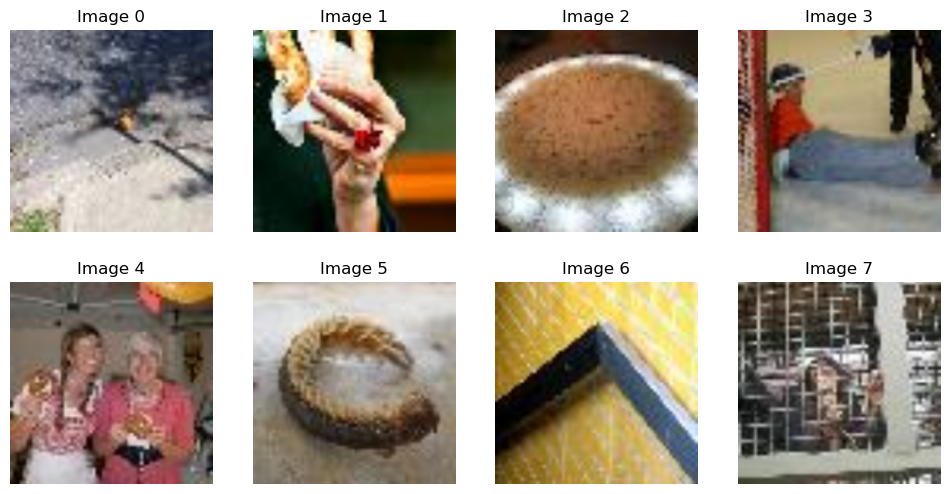

In [ ]:
interp.plot_top_losses(k=8)